In [6]:
import pandas as pd
import os
from settings import comparison_dict

In [7]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in comparison_dict.items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [8]:
geog = 'rg'
geog_col = 'hh_rg_proposed'

# Population

In [9]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_population.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Persons')

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"343,198","343,198","343,198"
Core,"922,607","922,607","922,607"
HCT,"887,595","887,595","887,595"
Metro,"1,186,049","1,186,049","1,186,049"
Rural,"536,490","536,490","536,490"
UU,"164,074","164,074","164,074"


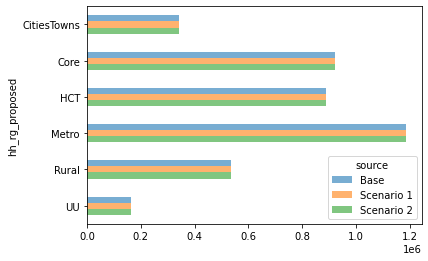

In [10]:
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Employment

In [11]:
df = load_data('2_employment.csv', geog)
df['Workers'] = df['Paid Full-Time Worker']+df['Paid Part-Time Worker']
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Workers')
df

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"163,272","163,272","163,272"
Core,"459,707","459,707","459,707"
HCT,"425,435","425,435","425,435"
Metro,"655,441","655,441","655,441"
Rural,"239,092","239,092","239,092"
UU,"75,637","75,637","75,637"


# Transit Ridership

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"17,685","17,685","17,685"
Core,"108,278","108,278","108,278"
HCT,"72,678","72,678","72,678"
Metro,"251,096","251,096","251,096"
Rural,"14,368","14,368","14,368"
UU,"6,054","6,054","6,054"


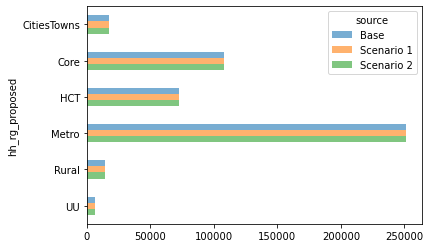

In [12]:
df = load_data('3_transit_trips.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='trexpfac')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

## Transit Commute Mode Share

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,3.6%,3.6%,3.6%
Core,6.3%,6.3%,6.3%
HCT,4.9%,4.9%,4.9%
Metro,8.0%,8.0%,8.0%
Rural,2.4%,2.4%,2.4%
UU,2.9%,2.9%,2.9%


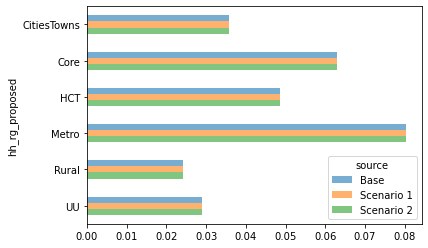

In [13]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('4_transit_commute_share.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='mode_share')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# VMT

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"7,454,629","7,454,629","7,454,629"
Core,"14,868,075","14,868,075","14,868,075"
HCT,"15,190,547","15,190,547","15,190,547"
Metro,"14,060,262","14,060,262","14,060,262"
Rural,"13,817,833","13,817,833","13,817,833"
UU,"3,110,398","3,110,398","3,110,398"
Total,"68,501,744","68,501,744","68,501,744"


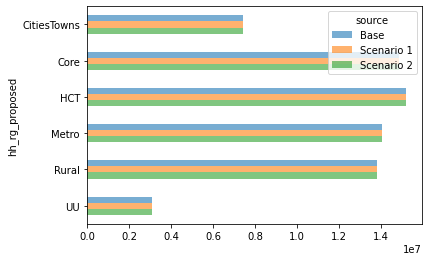

In [14]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"7,454,629","7,454,629","7,454,629"
Core,"14,868,075","14,868,075","14,868,075"
HCT,"15,190,547","15,190,547","15,190,547"
Metro,"14,060,262","14,060,262","14,060,262"
Rural,"13,817,833","13,817,833","13,817,833"
UU,"3,110,398","3,110,398","3,110,398"
Total,"68,501,744","68,501,744","68,501,744"


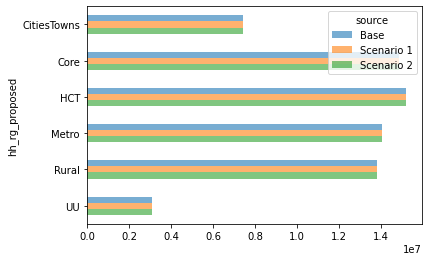

In [15]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

# Delay
**Total Delay Hours per Day**

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"33,528","33,528","33,528"
Core,"77,450","77,450","77,450"
HCT,"86,142","86,142","86,142"
Metro,"70,004","70,004","70,004"
Rural,"45,456","45,456","45,456"
UU,"14,705","14,705","14,705"
Total,"327,285","327,285","327,285"


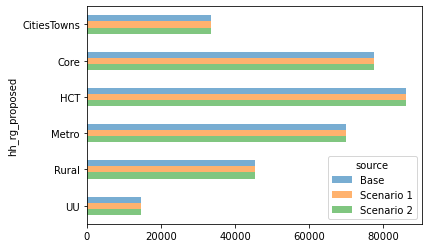

In [16]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Total Delay Hours')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

**Delay Hours per Household**


source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,16.5,16.5,16.5
Core,12.9,12.9,12.9
HCT,15.5,15.5,15.5
Metro,7.7,7.7,7.7
Rural,14.3,14.3,14.3
UU,15.6,15.6,15.6
Total,82.5,82.5,82.5


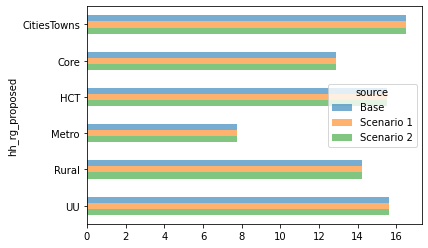

In [17]:
pd.options.display.float_format = '{:0,.1f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', 
                    aggfunc='sum', values='Avg. Minutes of Delay per Household')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df